In [6]:
import os 
#Local Path to modules (PYTHONPATH)
PYLOCAL = 'C:\\Users\\flr\\rzgshare\\work\\W7X\\python\\git' 
os.chdir(PYLOCAL)
%matplotlib inline
import matplotlib
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

In [7]:
import atomdat.adas.ibal as ibal; reload(ibal)
#padas = 'C:\\Users\\flr\\rzgshare\\work\\W7X\\python\\data\\atomdat\\adas2\\'
#elem = 'n'
#te, fz, spln = ibal.coronal(elem,pn=padas+'adf11\\',fplt=False)
padas = 'C:\\Users\\flr\\rzgshare\\work\\W7X\\python\\data\\atomdat\\adas2\\'
elem = 'c'
te, fz, spl = ibal.coronal(elem,pn=padas+'adf11\\',fplt=False)

In [4]:
import atomdat.adas.ibal as ibal; reload(ibal)
pn = padas+'adf11\\'
te = np.logspace(0.,4.,100)
ne = np.ones(te.shape)*1E20
_,fzn,lzn,lzln = ibal.calc_fz('n',te=te,ne=ne)
_,fzc,lzc,lzlc = ibal.calc_fz('c',te=te,ne=ne)

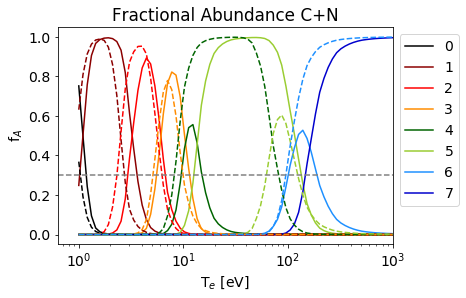

In [76]:
import scipy.interpolate as spi
import utils.colors as colors; clrs = colors.clrs()
fig = plt.figure()
ax = plt.gca()
for i in range(fzn.shape[1]):
    #fzfit = spi.splev(ten,spln[i],der=0)
    ax.plot(te, fzn[:,i],color=clrs.ls[i],label=str('%i' %i))
    #ax.plot(ten,fzfitn,'--',color='k',alpha=0.3)
for i in range(fzc.shape[1]):
    ax.plot(te, fzc[:,i],'--',color=clrs.ls[i],label='__nolegend__')

plt.xscale('log')
plt.xlim((None,1000.))
plt.axhline(0.3,c='grey',ls='--')
plt.legend(bbox_to_anchor=(1.,1.),loc=2)
plt.ylabel('f$_A$')
plt.xlabel('T$_e$ [eV]')
plt.title('Fractional Abundance C+N')
#plt.xlim((1,30))
plt.show(block=False)

In [5]:
_,fzne,lzne,lzlne = ibal.calc_fz('ne',year=['96','96','89','96','96'],fnc=[],te=te,ne=ne)
fig = ibal.plot_fz(te,fzn)#,lr=np.arange(13))
fig = ibal.plot_fz(te,fzne,ls='--',lr=np.arange(13),fig=fig)
_ = fig.gca().set_title('N+Ne')

TypeError: must be str, not list

In [ ]:
#fig = ibal.plot_fz(ten,fzn)
fig = ibal.plot_fz(te,fz)#,fig=None,ls='--',leg=False)
fig = ibal.plot_fz(tec,fzc,fig=fig,ls=':',leg=False)

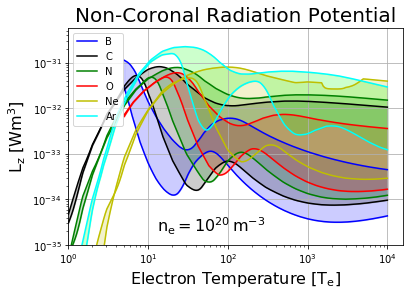

In [31]:
import atomdat.lz as lz;  reload(lz); lz = lz.LZ()
lz.plot_lz_full()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


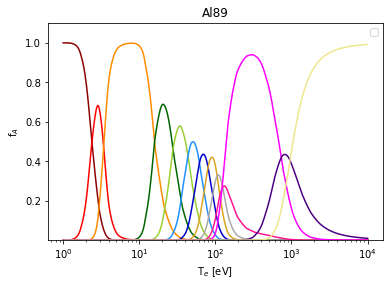

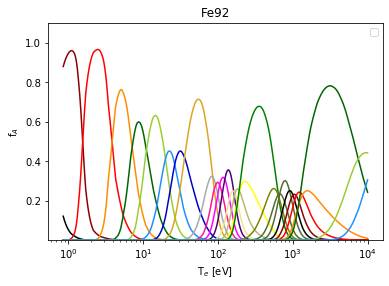

In [12]:
import atomdat.adas.ibal as ibal; reload(ibal)
padas = 'C:\\Users\\flr\\rzgshare\\work\\W7X\\python\\data\\atomdat\\adas2\\'
elem = 'al'
teal, fzal, splal = ibal.coronal(elem,pn=padas+'adf11\\',year='89',fplt=False,fsilent=True)
fig = ibal.plot_fz(teal,fzal,lr=np.arange(13))
_ = fig.gca().set_title('Al89')

import atomdat.adas.ibal as ibal; reload(ibal)
padas = 'C:\\Users\\flr\\rzgshare\\work\\W7X\\python\\data\\atomdat\\adas2\\'
elem = 'fe'
tefe, fzfe, splfe = ibal.coronal(elem,pn=padas+'adf11\\',year='92',fplt=False,fsilent=True)
fig = ibal.plot_fz(tefe,fzfe)#,lr=np.arange(13))
_ = fig.gca().set_title('Fe92')

In [41]:
lz.read('C')
Vc=30.
R1 = 5.5; R2 = 5.6
Ve = (np.pi**2)*(R1+R2)*(R2**2-R1**2)
cC=1.5E-2
te = 1000.; tau =-1; ne = 12E19
emis = ne**2*cC*lz.get(te,tau)
print('Core')
print('E = %.3e W/m3' %emis)
print(' P = %.3e W' %(emis*Vc))
te = 6.; tau =-1; ne = 3E19
emis = ne**2*cC*lz.get(te,tau)
print('Edge')
print('E = %.3e W/m3' %emis)
print(' P = %.3e W' %(emis*Ve))

Core
E = 1.809e+04 W/m3
 P = 5.426e+05 W
Edge
E = 5.947e+05 W/m3
 P = 7.232e+07 W


In [6]:
import atomdat.adas.adf11 as adf11; reload(adf11)
fb = 'C:\\Users\\flr\\rzgshare\\work\\W7X\\python\\data\\atomdat\\adas2\\adf11\\'
acd1 = adf11.ADF11()
scd1 = adf11.ADF11()
ccd1 = adf11.ADF11()
plt1 = adf11.ADF11()
prb1 = adf11.ADF11()
fn = 'acd96\\acd96_c.dat'
_ = acd1.read(fn,fb)
fn = 'scd96\\scd96_c.dat'
_ = scd1.read(fn,fb)
fn = 'ccd96\\ccd96_c.dat'
_ = ccd1.read(fn,fb)
fn = 'plt96\\plt96_c.dat'
_ = plt1.read(fn,fb)
fn = 'prb96\\prb96_c.dat'
_ = prb1.read(fn,fb)

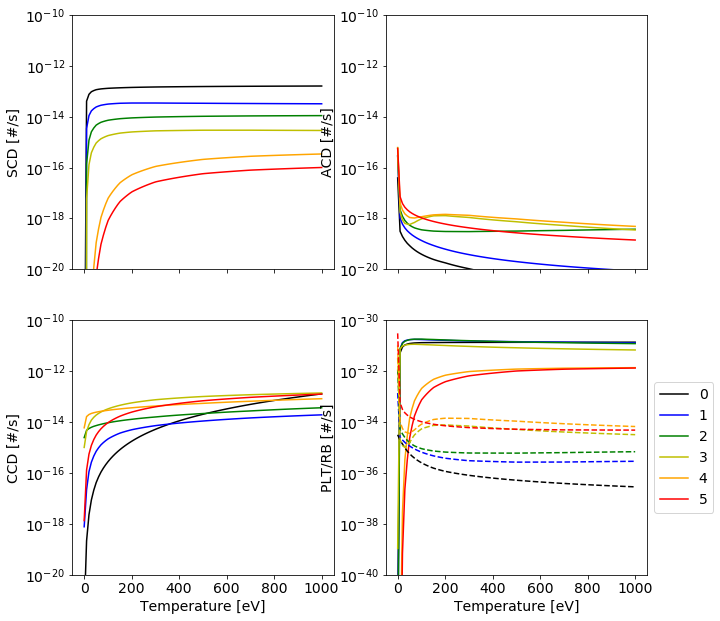

In [46]:
import numpy as np
fig,axs = plt.subplots(2,2,figsize=(10.3,10.3),sharex=True)
axs = axs.flatten()
lst  = [scd1,acd1,ccd1,plt1]
ylab = ['SCD','ACD','CCD','PLT']
ylim = [[1E-20,1.E-10],[1E-20,1.E-10],[1E-20,1.E-10],[1E-40,1.E-30]]
lcol = ['k','b','g','y','orange','r','violet','brown','gray']
nt = 100
tel = np.linspace(0.3,1000.,nt)
ne = 10.E19
nel = np.ones(nt)*ne
for j,item in enumerate(lst):
    ax = axs[j]
    for i in range(item.dat.nz):
        ax.plot(tel,item.interpolate(nel,tel,i),label=str('%i' %i),c=lcol[i])
        ax.set_ylabel(ylab[j]+' [#/s]')
    ax.set_yscale('log')
    ax.set_ylim(ylim[j])

item = prb1
for i in range(item.dat.nz):
    ax.plot(tel,item.interpolate(nel,tel,i),ls='--',label='__nolegend__',c=lcol[i])
    ax.set_ylabel('PLT/RB [#/s]')
    #ax.set_ylim([1E-40.E-5])

axs[3].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].set_xlabel('Temperature [eV]')
axs[3].set_xlabel('Temperature [eV]')
plt.show(block=False)

# Ionization Balance

No handles with labels found to put in legend.


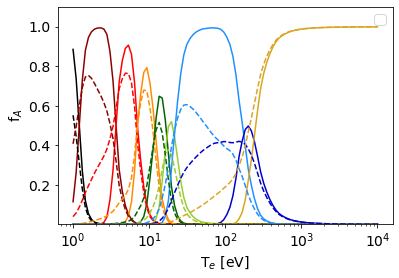

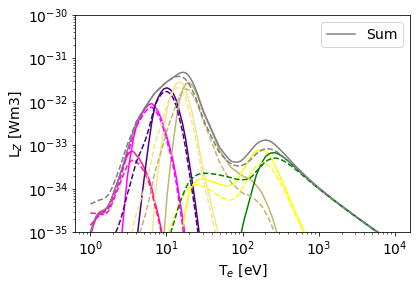

In [11]:
import utils.plot as pu
import atomdat.adas.ibal as ibal; reload(ibal)
te = np.logspace(0.,4.,100)
ne = 1E20
te,fz,lz, lzl = ibal.calc_fz('o',te=te,ne=ne)
fig1 = ibal.plot_fz(te,fz,leg=True)
fig2 = ibal.plot_lz(te,lz,leg=True)
te2,fz2,lz2, lzl2 = ibal.calc_fz('o',te=te,ne=ne,taus=1E-2)
fig1 = ibal.plot_fz(te2,fz2,fig=fig1,leg=False,ls='--')
fig2 = ibal.plot_lz(te2,lz2,fig=fig2,leg=False,ls='--')

No handles with labels found to put in legend.


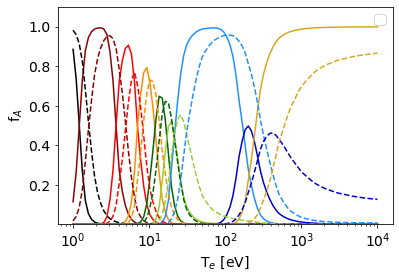

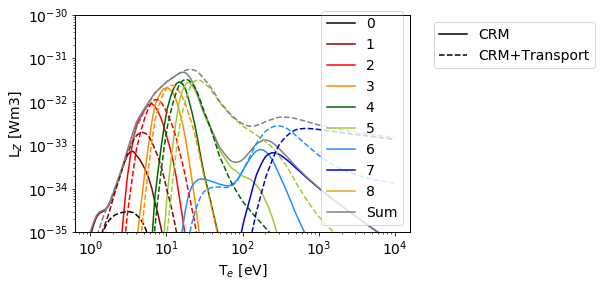

In [15]:
import atomdat.adas.ibal as ibal; reload(ibal)
te,fz,lz,lzl = ibal.calc_fz('o',te=te,ne=ne)
fig1 = ibal.plot_fz(te,fz)
fig2 = ibal.plot_lz(te,lz)
te2,fz2,lz2,lzl2 = ibal.calc_fz('o',te=te,ne=ne,taua=1E-3)
fig1 = ibal.plot_fz(te2,fz2,fig=fig1,leg=False,ls='--')
fig2 = ibal.plot_lz(te2,lz2,fig=fig2,leg=False,ls='--')
pu.secondary_legend(fig2.gca(),['CRM','CRM+Transport'],['k-','k--'])

No handles with labels found to put in legend.


"\ntax = ax.twinx()\ntax.plot([],[],'k-',label='CRM')\ntax.plot([],[],'k--',label='CRM+Neutrals')\ntax.set_ylabel('')\ntax.set_yticks([])\ntax.legend(bbox_to_anchor=(1.05,1.0),loc=2)\n"

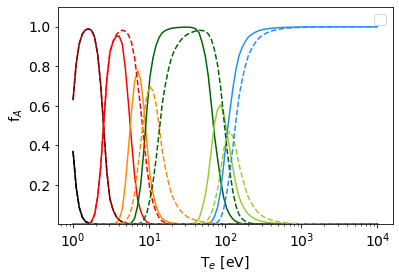

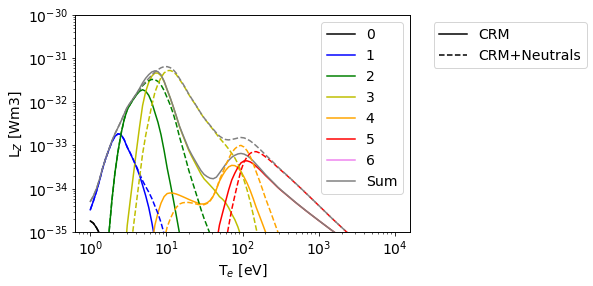

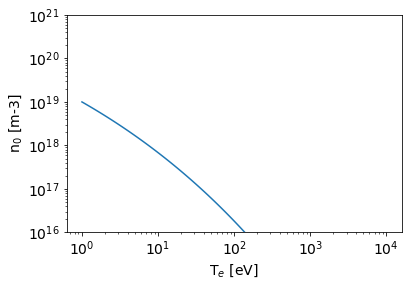

In [16]:
import atomdat.adas.ibal as ibal; reload(ibal)
import utils.plot as pu; reload(pu)
te,fz,lz,lzl = ibal.calc_fz('c',te=te,ne=ne)
fig1 = ibal.plot_fz(te,fz)
fig2 = ibal.plot_lz(te,lz)
te2,fz2,lz2,lzl2 = ibal.calc_fz('c',te=te,ne=ne,n0=1.E19,e0=0.13,l0=0.13,fplt=True)
fig1 = ibal.plot_fz(te2,fz2,fig=fig1,leg=False,ls='--')
fig2 = ibal.plot_lz(te2,lz2,fig=fig2,leg=False,ls='--')
pu.secondary_legend(fig2.gca(),['CRM','CRM+Neutrals'],['k-','k--'])